In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir('C:\\Users\\Houtan\\OneDrive\\Documents\\GitHub\\my_grad')
print(os.getcwd())

C:\Users\Houtan\OneDrive\Documents\GitHub\my_grad


In [3]:
import sys
sys.path.append('C:\\Users\\Houtan\\OneDrive\\Documents\\GitHub\\my_grad')

In [4]:
from my_grad.value import Value
from my_grad.neural_network import Library, Neuron, Layer, MLP

In [5]:
# # random seed if want
# np.random.seed(42)
# random.seed(42)

In [6]:
# getting our dataset from scikit learn
# we want binary classification
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.1) # make_moons generates two interleaving half circles
                                            # commonly used in test clustering and classification algorithms due to its non-linear decision boundary

# want to make it so y is between -1 and 1, it is intially 0 to 1

y = y*2 - 1

X


array([[ 1.77800087,  0.40914698],
       [ 1.68110165, -0.29423847],
       [-0.39739627,  0.81297351],
       [ 1.87952323,  0.40748067],
       [ 0.65028278, -0.3554336 ],
       [ 0.40515215,  1.01077266],
       [-1.08026179,  0.02711691],
       [ 0.63065975,  0.63863531],
       [ 2.03182655,  0.19663157],
       [-0.89069853, -0.01088488],
       [-0.08492868,  0.2639398 ],
       [ 1.86785237, -0.07258707],
       [ 0.2708004 , -0.2197229 ],
       [ 1.92073256, -0.00660757],
       [ 0.79098653,  0.3656967 ],
       [-0.37990102,  1.08532773],
       [ 1.9336939 ,  0.11648389],
       [-0.4349592 ,  1.03054942],
       [ 0.21103389,  0.05076182],
       [ 0.1615841 , -0.04115046],
       [ 1.88795651, -0.24934434],
       [ 0.55096399, -0.53181565],
       [-0.11218571,  0.95506574],
       [ 0.45001909,  1.00422618],
       [ 0.79636229,  0.5429506 ],
       [ 1.07592685, -0.42907162],
       [ 0.52508027,  0.78431895],
       [ 0.85022493, -0.52888558],
       [ 0.96965596,

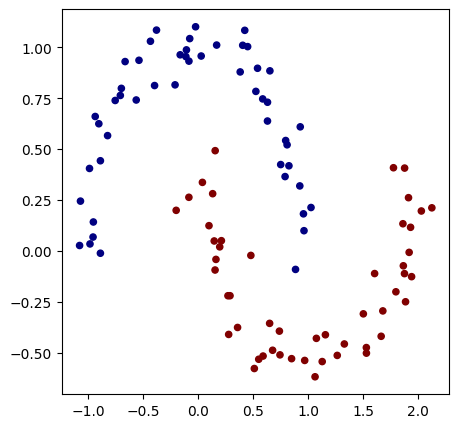

In [7]:
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [8]:
# initialise our model

model = MLP(2, [16, 16, 1], non_lin='tanh')
print(model)
print(f"number of parameters: {len(model.parameters())}")

MLP: [Layer of [TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2)], Layer of [TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16)], Layer of [TanhNeuron(16)]]
number of parameters: 337


In [9]:
# inputs = [list(map(Value, x_row)) for x_row in X]
# for input in inputs:
#     print([val.data for val in input])

In [12]:
# function for the loss function, considering putting in the class but haven't seen any other machine
# learning frameworks do this

def loss(batch_size=None): # could implement batch size method for datasets that are extremely large
    X_b, y_b = X, y

    # need to convert our dataset into our Value objects
    inputs = list(map(Value, x_row) for x_row in X_b)

    # then apply the model to each of these 
    scores = list(map(model, inputs))

    # calculating the Max-Margin Loss
    losses = [(1 + -y_i*score_i) for y_i, score_i in zip(y_b, scores)]

    #averaging the individual losses to get the mean loss
    data_loss = sum(losses) * ( 1.0 / len(losses))

    #L2 regularisation where it returns the sum squared of all parameters in the model
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))

    total_loss = data_loss + reg_loss

    accuracy = [(y_i > 0) == (score_i.data > 0) for y_i, score_i in zip(y_b, scores)]

    return total_loss, sum(accuracy) / len(accuracy)

In [13]:
total_loss, acc = loss()
print(total_loss, acc)

Value(data=1.0283707814539078, grad=0) 0.5


In [14]:
# optimisation

for epoch in range(100):

    # forward pass
    total_loss, acc = loss()

    # backward pass
    model.zero_grad()
    total_loss.backward()

    # 
    # learning rate to decrease as you get closer to the end of the steps
    learning_rate = 1.0 -0.9*epoch/100

    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if epoch % 10 == 0:
        print(f"Step: {epoch} | Loss: {total_loss.data} | Accuracy: {acc*100}%")


Step: 0 | Loss: 1.0283707814539078 | Accuracy: 50.0%
Step: 10 | Loss: 0.42415918985790413 | Accuracy: 79.0%
Step: 20 | Loss: 0.24258324116200594 | Accuracy: 90.0%
Step: 30 | Loss: 0.23333189745669602 | Accuracy: 90.0%
Step: 40 | Loss: 0.22396928086696063 | Accuracy: 90.0%
Step: 50 | Loss: 0.21925263998813746 | Accuracy: 90.0%
Step: 60 | Loss: 0.21733535279168528 | Accuracy: 91.0%
Step: 70 | Loss: 0.21625507439824776 | Accuracy: 91.0%
Step: 80 | Loss: 0.21550970624652022 | Accuracy: 91.0%
Step: 90 | Loss: 0.21501340491973941 | Accuracy: 91.0%
